# Kernel - PCA

In [12]:
#from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

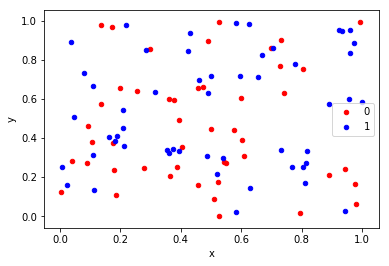

In [35]:
# Create a few random points
np.random.seed(100)
features =np.random.rand(100,2)
label = np.random.randint(0,2,(100,1))
df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=label[:,0]))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [251]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

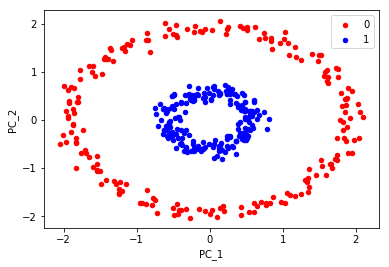

In [252]:
# applying PCA on to random dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pc = pca.fit_transform(x)

principalDf = pd.DataFrame(data = pc
                           ,columns = ['PC_1', 'PC_2'])
principalDf['label'] = y

# ploting
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = principalDf.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC_1', y='PC_2', label=key, color=colors[key])

plt.show()

In [79]:
#np.linalg.eig(cov_mat)

(array([ 9.3418921,  0.4081079]), array([[ 0.80864711, -0.58829402],
        [ 0.58829402,  0.80864711]]))

In [277]:
C

array([[ 1.        ,  0.66258662,  0.71920828, ...,  0.7604518 ,
         0.36720297,  0.56705007],
       [ 0.66258662,  1.        ,  0.89410268, ...,  0.6669064 ,
         0.55094486,  0.58764104],
       [ 0.71920828,  0.89410268,  1.        , ...,  0.67420489,
         0.49688906,  0.6407317 ],
       ..., 
       [ 0.7604518 ,  0.6669064 ,  0.67420489, ...,  1.        ,
         0.40469946,  0.45877642],
       [ 0.36720297,  0.55094486,  0.49688906, ...,  0.40469946,
         1.        ,  0.37652343],
       [ 0.56705007,  0.58764104,  0.6407317 , ...,  0.45877642,
         0.37652343,  1.        ]])

In [111]:
# covariance matrix of randomly generated data
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0])
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.          0.10235266]
 [ 0.10235266  1.        ]]


In [425]:
# calculate covariance matrix using kernels
def kernel(x, y, mode = 'rbf', sigma = 0.25, c = 1): 
    
    if mode == 'rbf':
        rbf = np.exp(-np.linalg.norm(x - y)/ 2*sigma**2)
        return rbf
    

In [426]:
# calculating the gram matrix or C = 1/n * summation(i,n) k(xi,xi)
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
A = X
n = A.shape[0]
d = A.shape[1]
K = np.ones((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = kernel(A[i], A[j])

K_SUM = K.sum() / (n ** 2)
K_SUMROWS = K.sum(axis=1) / n

C_ = np.ones((n, n))
for i in range(n):
    for j in range(n):
        C_[i, j] = K[i, j] - K_SUMROWS[i] - K_SUMROWS[j] + K_SUM


        

In [427]:
# eigen values and vectors of the calculated matrix C_std
eig_values, eig_vectors = np.linalg.eig(C_)
idx = eig_values.argsort()[::-1]   
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
sub_eig_vectors = eig_vectors[0:d,:]

In [437]:
sub_eig_vectors.shape

(2, 400)

In [440]:
# calculating PC_1 and PC_2
"""PC = 2
final = np.zeros((PC, X.shape[0]))
for i in range(PC):
    for j in range(X.shape[0]):
        temp = 0
        for z in range(X.shape[0]):
            temp = temp + eigen_vectors[i,j]*kernel(C_std[i],C_std[z])
        
        final[i,j] = temp"""

eig_vectors = eig_vectors.T
A_new = np.ones((n,d))
for i in range(n):
    for j in range(d):
        coco = 0
        for z in range(n):
            coco = coco + sub_eig_vectors[z,j]*kernel(A[i],A[z])
        A_new[i,j] = coco


In [441]:
eig_vectors[z,j]

0.050000000000990398

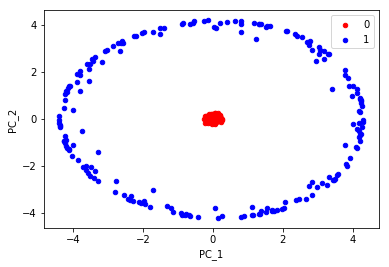

In [974]:
#Kernel PCA plot
kernelDf = pd.DataFrame(data = X_new
                           ,columns = ['PC_1', 'PC_2'])
kernelDf['label'] = y

# ploting
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
#fig.set_size_inches(1,1)
grouped = kernelDf.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC_1', y='PC_2', label=key, color=colors[key])

plt.show()

In [480]:
from sklearn.decomposition import KernelPCA
#transformer = KernelPCA(n_components=2, kernel='rbf', gamma= 10)
#X_transformed = transformer.fit_transform(X)
#np.random.seed(0)
#X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=8)
X_kpca = kpca.fit_transform(X)


# Plot results

In [432]:
X_kpca[:,:2].shape

(400, 2)

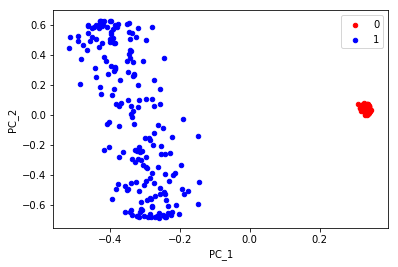

In [481]:
#Kernel PCA plot
kernelDf_true = pd.DataFrame(data = X_kpca[:,:2]
                           ,columns = ['PC_1', 'PC_2'])
kernelDf_true['label'] = y

# plotting
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = kernelDf_true.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC_1', y='PC_2', label=key, color=colors[key])

plt.show()

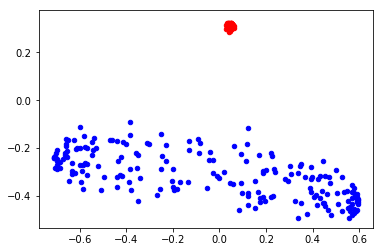

In [970]:
reds = y == 0
blues = y == 1
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20)
plt.show()

In [189]:
from sklearn.datasets import make_circles

In [190]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

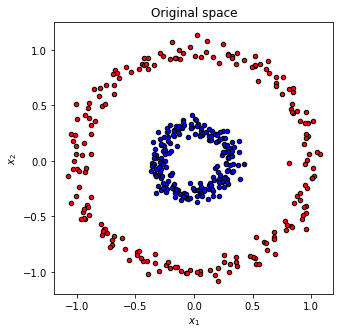

In [197]:
plt.figure(figsize= (5,5))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [969]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

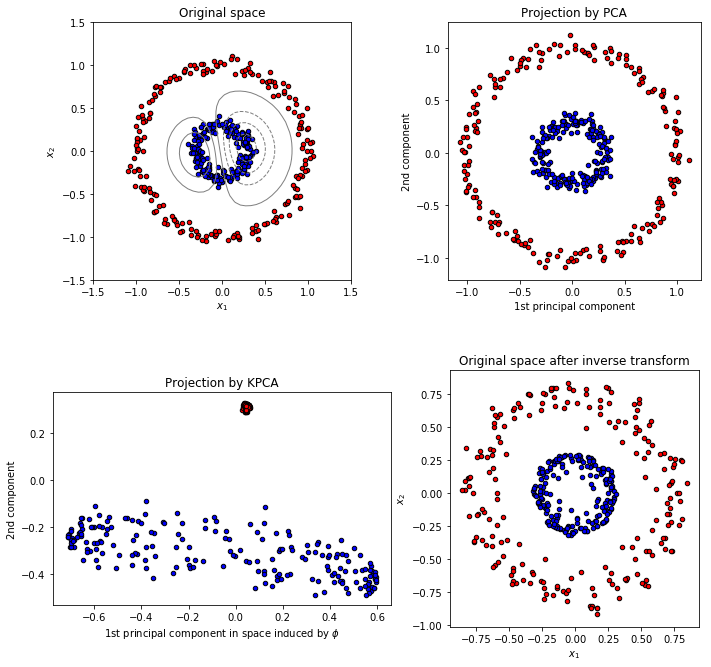

In [375]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize= (10,10))

plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

In [447]:
eig_vectors.shape

(400, 400)

In [971]:
np.random.seed(0)

# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler



class Kernel_PCA(object):
    
    def __init__(self, X, y, mode): 
        
        self.X = X
        self.y = y
        self.mode = mode
        self.X_my_new = self._kpca_implementation()
        #self.X_new = 
        
    def _kernels(self, x_i, x_j, mode = 'rbf'):
        
        if mode == "rbf":
            #print(SIGMA)
            return np.exp(-GAMMA * np.linalg.norm(x_i - x_j)**2)
        
        elif mode == "polynomial":
            return (x_i.T.dot(x_j) + 1) ** 2
        
        elif mode == "sigmoid":
            return tanh(K3_alpha*X.T.dot(Y) + K3_constatnt)
        
    def _kpca_implementation(self, PC = 2):
        
        # standardize the feature vector
        #X_std = StandardScaler().fit_transform(self.X)
        X_std = self.X
        # Calculating the kernel 
        n = X_std.shape[0]
        d = X_std.shape[1]
        K = np.zeros((X_std.shape[0],X_std.shape[0]))
        for i in range(n):
            for j in range(n):
                K[i,j] = self._kernels(X_std[i],X_std[j], self.mode)
        
        # Centering the kernel
        I = np.ones((n,n))/n
        K_center = K - 2*np.dot(I,K) + np.dot(np.dot(I,K),I)
        
        """K_sum = K.sum() / (n ** 2)
        K_rowsum = K.sum(axis=1) / n
        K_center = np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                K_center[i,j] = K[i,j] - K_rowsum[i] - K_rowsum[j] + K_sum
                """
        # Caculating eigne values and eigen vectors
        eig_values, eig_vectors = np.linalg.eig(K_center)
        idx = eig_values.argsort()[::-1]   
        eig_values = eig_values[idx]
        eig_vectors = eig_vectors[:,idx]

        # Calculating the new representation of X 
        eig_vectors_pc = eig_vectors[:,:PC].T
        X_new = np.zeros((n, PC))
        for i in range(n):
            for j in range(PC):
                temp = 0
                for k in range(n):
                    temp += eig_vectors[k,j]*self._kernels(X_std[i],X_std[k])
                
                X_new[i,j] = temp
        
        return X_new
        
PC = 2 # number of principle components
GAMMA = 8 # sigma value for rbf kernel

np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05) # dataset for comparison
        
"""if __name__ = '__main__':
    
    PC = 2 # number of principle components
    SIGMA = 0.25 # sigma value for rbf kernel
    
    np.random.seed(0)
    X, y = make_circles(n_samples=400, factor=.3, noise=.05) # dataset for comparison
    
    """
    

"if __name__ = '__main__':\n    \n    PC = 2 # number of principle components\n    SIGMA = 0.25 # sigma value for rbf kernel\n    \n    np.random.seed(0)\n    X, y = make_circles(n_samples=400, factor=.3, noise=.05) # dataset for comparison\n    \n    "

In [972]:
pca = Kernel_PCA(X, y, 'rbf')

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:73: ComplexWarning: Casting complex values to real discards the imaginary part


In [973]:
X_new = pca.X_my_new

In [968]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

# Kernalised Kmeans

## Standard K-means

In [943]:
# Dependencies 
from sklearn.datasets import make_blobs
import random

In [952]:
# Use blob dataset python 
X,Y = make_blobs(400, 2,centers = 4)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))

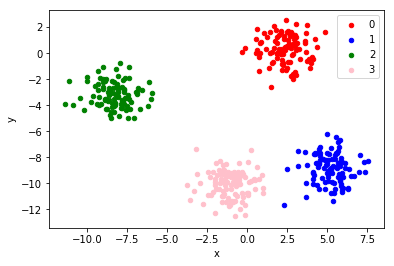

In [953]:
# Plot the features 
colors = {0:'red', 1:'blue', 2:'green', 3:'pink'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

In [960]:
## Vanilla K-means

def assign(distances, rows, n_clusters, centers_temp, threshold = 0):
    
    global stability
    reassign_dict = dict()
    for i in range(n_clusters): reassign_dict[i] = list()

    for r in range(rows):
        temp = [dist_from_ref[i][r] for i in range(n_clusters)]
        reassign_dict[temp.index(min(temp))].append(min(temp))
        
    centers = center_calc(reassign_dict, n_clusters)
    if np.linalg.norm(centers - centers_temp) == threshold : stability = True
    
    return reassign_dict, centers


def center_calc(reassign_dict, n_clusters):
    
    temp_list = list()
    
    for n in range(n_clusters):
        temp_X = X[[j[0] for j in reassign_dict[n]]]
        temp_list.append([temp_X[:,0].mean(), temp_X[:,1].mean()])
    
    return np.array(temp_list)
    
    
def distance(x,x_i, mode = 'linear'):
    
    if mode == 'linear':
        return np.linalg.norm(x - x_i)
    
    elif mode == 'rbf':
        return np.exp(-GAMMA * np.linalg.norm(x - x_i)**2)
        

n_clusters = 4
stability = False 
GAMMA = 1

# selecting 'n_clusters' points at random
idx = random.sample(range(1, X.shape[0]), n_clusters)
centers_temp = X[idx]

chk = 0

while not stability:
    
    dist_from_ref = dict()

    for n in range(n_clusters):

        dist_from_ref[n] = list()
        for i in range(X.shape[0]):
            temp_dist =(i, distance(centers_temp[n],X[i], mode = 'rbf'))
            dist_from_ref[n].append(temp_dist)
            
    
    dic, centers_temp = assign(dist_from_ref, X.shape[0], n_clusters, centers_temp)
    
    chk += 1
    if chk == 100: break


In [961]:
dic = assign(dist_from_ref, 400, 3)

TypeError: assign() missing 1 required positional argument: 'centers_temp'

In [962]:
ls = [dic[1][i][0] for i in range(len(dic[1]))]

In [963]:
Y[ls]

array([0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 1, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 1, 1,
       3, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       3, 1, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0])

In [933]:
dic[2][1]

(4, 0.69899510918164065)

In [838]:
temp_2-temp_1

array([-4,  3])

In [693]:
idx = [temp_array[i][0] for i in range(temp_array.shape[0])]

In [818]:
centers_temp

array([[-4.86963303, -5.34821691],
       [-4.27960786, -0.1861594 ],
       [-8.98964821, -8.17306212]])

In [860]:
X[idx][1]

array([-8.25811549, -7.63255686])

In [747]:
a = [dist_from_ref[i][1] for i in range(3)]

In [749]:
min(a)

(1, 1.2620234583834797)

In [734]:
a.index(min(a))

2

In [795]:
a = [[1,2],[3,4]]

In [791]:
len(X[[j[0] for j in dic[1]]][:,1])

116

In [808]:
X[[j[0] for j in dic[1]]]

array([[-3.28033224, -3.92147356],
       [-3.6786983 , -3.47124501],
       [-3.7303536 , -3.97391478],
       [-4.71886095, -5.22657717],
       [-4.00511756, -3.16132224],
       [-4.07359457, -4.41014343],
       [-2.63169112, -4.02130454],
       [-3.43296698, -4.93759312],
       [-6.85976008, -4.0781558 ],
       [-3.40444162, -4.70069423],
       [-4.99800978, -3.74601186],
       [-4.63779232, -3.52386488],
       [-3.58833338, -4.37366917],
       [-5.6121805 , -3.01481097],
       [-3.24487167, -4.43029704],
       [-4.22826584, -3.77493148],
       [-4.68372868, -3.18810074],
       [-4.28173914, -3.93639331],
       [-3.19496504, -6.1751874 ],
       [-4.07633227, -4.71510546],
       [-3.87756587, -3.41330261],
       [-3.53280388, -4.55849777],
       [-4.54464791, -2.86194186],
       [-1.88554032, -5.18736952],
       [-4.12763964, -3.14425116],
       [-3.23839471, -4.20762447],
       [-4.6325904 , -2.83898013],
       [-5.28075988, -2.5583562 ],
       [-4.69859933,

In [899]:
X[:,1].mean()

-3.8909880075072873